In [ ]:
!git clone https://github.com/zebular13/ChickenLanguageDataset.git

fatal: destination path 'ChickenLanguageDataset' already exists and is not an empty directory.


In [ ]:
!pip install pydub
!apt-get install ffmpeg -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [ ]:
import os
from pydub import AudioSegment

def convert_to_wav(folder_path):
    for root, _, files in os.walk(folder_path):
        for file in files:
            if file.endswith(('.mp3', '.m4a')):
                file_path = os.path.join(root, file)
                output_path = os.path.splitext(file_path)[0] + '.wav'
                try:
                    audio = AudioSegment.from_file(file_path)
                    audio.export(output_path, format='wav')
                    print(f"Converted: {file_path}")
                except Exception as e:
                    print(f"Error converting {file_path}: {e}")

convert_to_wav("ChickenLanguageDataset")

Converted: ChickenLanguageDataset/longer_segments/let_us_out/let_us_out.mp3
Converted: ChickenLanguageDataset/longer_segments/let_us_out/finally_getting_out.mp3


In [ ]:
import glob

wav_files = glob.glob("ChickenLanguageDataset/**/*.wav", recursive=True)
print(f"Total WAV files found: {len(wav_files)}")
print(wav_files[:5])  # Show a few examples

Total WAV files found: 156
['ChickenLanguageDataset/noise/3secnoise.wav', 'ChickenLanguageDataset/noise/Noise (and Footsteps).wav', 'ChickenLanguageDataset/noise/Noise (and Footsteps)2.wav', 'ChickenLanguageDataset/noise/Noise (and Birds).wav', 'ChickenLanguageDataset/noise/Noise (and Birds)2.wav']


In [ ]:
test_file = wav_files[0]  # First WAV file from earlier
features = extract_features(test_file)
print(features)

{'mfcc_1': np.float32(-405.9985), 'mfcc_2': np.float32(101.6663), 'mfcc_3': np.float32(4.0801215), 'mfcc_4': np.float32(11.961362), 'mfcc_5': np.float32(5.289368), 'mfcc_6': np.float32(14.695767), 'mfcc_7': np.float32(2.265166), 'mfcc_8': np.float32(9.904128), 'mfcc_9': np.float32(0.9795685), 'mfcc_10': np.float32(6.767727), 'mfcc_11': np.float32(0.044872057), 'mfcc_12': np.float32(5.5456047), 'mfcc_13': np.float32(-5.864075), 'mfcc_14': np.float32(-0.45743966), 'mfcc_15': np.float32(-4.211717), 'mfcc_16': np.float32(2.5602236), 'mfcc_17': np.float32(-2.157725), 'mfcc_18': np.float32(3.2560909), 'mfcc_19': np.float32(-2.5710156), 'mfcc_20': np.float32(2.043333), 'zcr': np.float64(0.092193603515625), 'spectral_centroid': np.float64(1626.8454917721283), 'chroma': np.float32(0.6279629)}


In [ ]:
import os
import glob
import pandas as pd

data = []

# Use this to get .wav files deeper in the folders
wav_files = glob.glob("ChickenLanguageDataset/**/*.wav", recursive=True)

print(f"Found {len(wav_files)} WAV files")

for file in wav_files:
    print(f"Processing: {file}")  # This helps confirm it's doing something
    try:
        features = extract_features(file)
        label = os.path.basename(os.path.dirname(file))  # Folder name as label
        features['label'] = label
        data.append(features)
    except Exception as e:
        print(f"Error processing {file}: {e}")

df = pd.DataFrame(data)
df.to_csv("chicken_features.csv", index=False)
print("✅ Feature extraction complete! Saved as 'chicken_features.csv'")

Found 156 WAV files
Processing: ChickenLanguageDataset/noise/3secnoise.wav
Processing: ChickenLanguageDataset/noise/Noise (and Footsteps).wav
Processing: ChickenLanguageDataset/noise/Noise (and Footsteps)2.wav
Processing: ChickenLanguageDataset/noise/Noise (and Birds).wav
Processing: ChickenLanguageDataset/noise/Noise (and Birds)2.wav
Processing: ChickenLanguageDataset/longer_segments/let_us_out/let_us_out.wav
Processing: ChickenLanguageDataset/longer_segments/let_us_out/finally_getting_out.wav
Processing: ChickenLanguageDataset/longer_segments/ground_alarm/Alarm_Calls_cat.wav
Processing: ChickenLanguageDataset/longer_segments/ground_alarm/Chickens alarm calling.wav
Processing: ChickenLanguageDataset/longer_segments/ground_alarm/ground_alarm.wav
Processing: ChickenLanguageDataset/longer_segments/eating /Sunflower Seeds.wav
Processing: ChickenLanguageDataset/longer_segments/eating /Meal Worms (surf And Turf).wav
Processing: ChickenLanguageDataset/longer_segments/eating /Delicious treats

In [ ]:
pd.read_csv("chicken_features.csv").head()

,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,...,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19,mfcc_20,zcr,spectral_centroid,chroma,label
0,-405.99850,101.66630,4.080121,11.961362,5.289368,14.695767,2.265166,9.904128,0.979568,6.767727,...,-4.211717,2.560224,-2.157725,3.256091,-2.571016,2.043333,0.092194,1626.845492,0.627963,noise
1,-480.28265,153.23984,-16.933010,14.783328,12.485290,-0.380921,11.719110,7.363374,-5.159476,6.635729,...,3.206194,4.995517,-5.756603,6.742987,1.101972,-0.709616,0.049356,2562.706813,0.654679,noise
2,-418.40020,128.93663,2.018756,17.803100,15.612883,4.667098,13.753642,12.953186,2.709921,9.439756,...,4.026373,4.905806,-1.565443,6.264062,3.561797,2.205903,0.034710,2135.819529,0.709350,noise
3,-428.24820,115.84533,6.616836,8.484945,4.888012,17.609991,2.688534,6.608109,3.927395,6.056020,...,-1.569654,2.049217,1.226651,3.167871,-0.956802,0.812578,0.076238,1381.088262,0.642581,noise
4,-438.54370,127.34194,17.660980,11.683844,4.115424,18.100405,4.694051,4.062844,2.982740,2.955768,...,1.340809,3.585789,2.473177,4.060095,0.320399,1.746675,0.054247,1136.271387,0.536578,noise


In [ ]:
import librosa
import numpy as np
import pandas as pd

def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)

    features = {
        "mfcc_mean": np.mean(librosa.feature.mfcc(y=y, sr=sr).T, axis=0),
        "zcr": np.mean(librosa.feature.zero_crossing_rate(y)),
        "spectral_centroid": np.mean(librosa.feature.spectral_centroid(y=y, sr=sr)),
        "chroma": np.mean(librosa.feature.chroma_stft(y=y, sr=sr))
    }

    flat_features = {
        f"mfcc_{i+1}": val for i, val in enumerate(features["mfcc_mean"])
    }
    flat_features.update({
        "zcr": features["zcr"],
        "spectral_centroid": features["spectral_centroid"],
        "chroma": features["chroma"]
    })

    return flat_features

In [ ]:
import pandas as pd

df = pd.read_csv("chicken_features.csv")
df.head()

,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,...,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19,mfcc_20,zcr,spectral_centroid,chroma,label
0,-405.99850,101.66630,4.080121,11.961362,5.289368,14.695767,2.265166,9.904128,0.979568,6.767727,...,-4.211717,2.560224,-2.157725,3.256091,-2.571016,2.043333,0.092194,1626.845492,0.627963,noise
1,-480.28265,153.23984,-16.933010,14.783328,12.485290,-0.380921,11.719110,7.363374,-5.159476,6.635729,...,3.206194,4.995517,-5.756603,6.742987,1.101972,-0.709616,0.049356,2562.706813,0.654679,noise
2,-418.40020,128.93663,2.018756,17.803100,15.612883,4.667098,13.753642,12.953186,2.709921,9.439756,...,4.026373,4.905806,-1.565443,6.264062,3.561797,2.205903,0.034710,2135.819529,0.709350,noise
3,-428.24820,115.84533,6.616836,8.484945,4.888012,17.609991,2.688534,6.608109,3.927395,6.056020,...,-1.569654,2.049217,1.226651,3.167871,-0.956802,0.812578,0.076238,1381.088262,0.642581,noise
4,-438.54370,127.34194,17.660980,11.683844,4.115424,18.100405,4.694051,4.062844,2.982740,2.955768,...,1.340809,3.585789,2.473177,4.060095,0.320399,1.746675,0.054247,1136.271387,0.536578,noise


In [ ]:
X = df.drop("label", axis=1)
y = df["label"]

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [ ]:
le.inverse_transform([0, 1, 2])

array(['3seconds', 'aerial_alarm', 'disturbed_in_nest_box'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Get the unique classes predicted by the model
predicted_classes = np.unique(y_pred)

# Precision, Recall, F1-score (use labels parameter to match predicted classes)
print("Classification Report:\n", classification_report(y_test, y_pred, labels=predicted_classes, target_names=le.classes_))

Accuracy: 0.75
Confusion Matrix:
 [[8 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 1 0 0 0 0 0]
 [0 0 1 0 2 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [1 0 0 0 5 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 1 0 6 0]
 [0 0 0 0 1 0 0 0 0 2]]
Classification Report:
                        precision    recall  f1-score   support

             3seconds       0.89      1.00      0.94         8
         aerial_alarm       1.00      0.50      0.67         2
disturbed_in_nest_box       1.00      0.33      0.50         3
               eating       1.00      1.00      1.00         1
              eating        0.50      0.83      0.62         6
             greeting       0.00      0.00      0.00         0
         ground_alarm       0.00      0.00      0.00         0
               hungry       1.00      0.75      0.86         8
           let_us_out       1.00      0.67      0.80         3

            micro avg       0.75      0.77      0.76        31
            macr

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:2687: UserWarning: labels size, 9, does not match size of target_names, 15
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to co

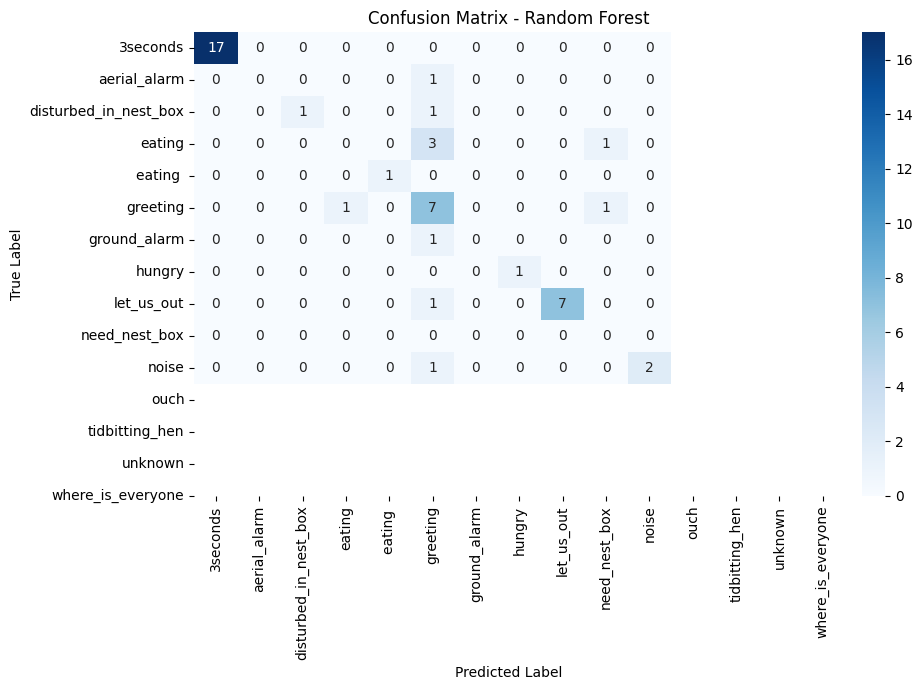

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest')
plt.tight_layout()
plt.show()

In [ ]:
# 1. Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 2. Load and prepare your data
# Make sure df is your dataframe with a 'label' column and features

# Encode the labels
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])

# Separate features and labels
X = df.drop(['label', 'label_encoded'], axis=1)
y = df['label_encoded']

In [ ]:
# 3. Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# 4. Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [ ]:
# 5. Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
# 6. Make predictions
y_pred = rf_model.predict(X_test)

In [ ]:
# 7. Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Fix IndexError here: use encoded class indices
predicted_classes = np.unique(y_pred)
print("Classification Report:\n", classification_report(
    y_test,
    y_pred,
    labels=predicted_classes,
    target_names=le.classes_[predicted_classes]
))

Accuracy: 0.7659574468085106
Confusion Matrix:
 [[17  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  1  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  3  0  0  0  1  0]
 [ 0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  1  0  7  0  0  0  1  0]
 [ 0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  1  0  0  7  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  2]]
Classification Report:
                        precision    recall  f1-score   support

             3seconds       1.00      1.00      1.00        17
disturbed_in_nest_box       1.00      0.50      0.67         2
               eating       0.00      0.00      0.00         4
              eating        1.00      1.00      1.00         1
             greeting       0.47      0.78      0.58         9
               hungry       1.00      1.00      1.00         1
       tidbitting_hen       1.00      0.88      0.93         8
              unknown     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


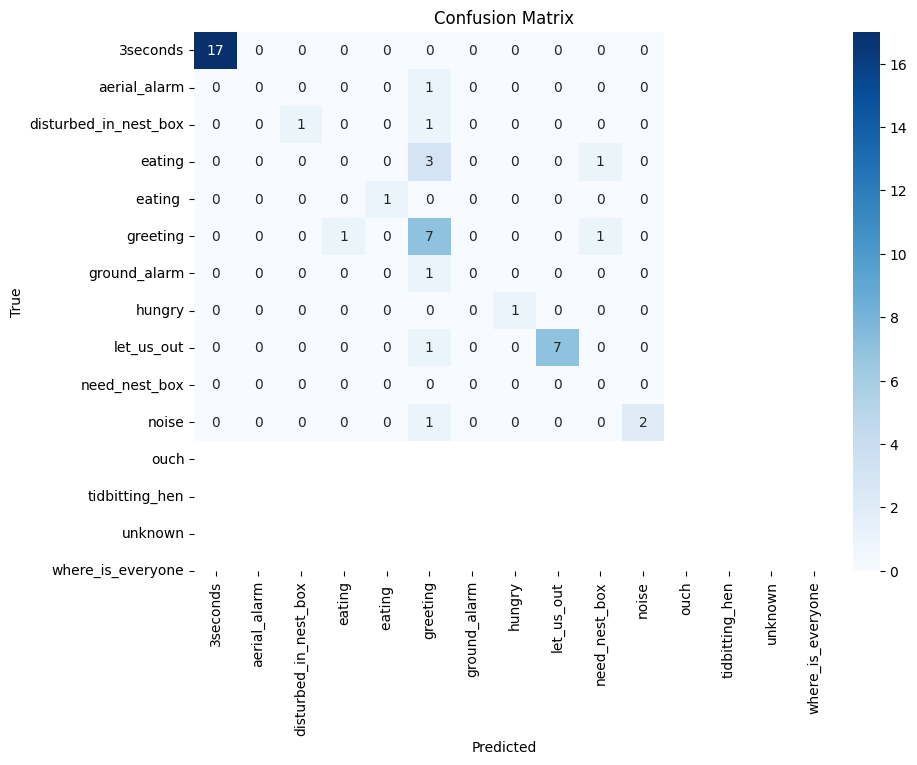

In [ ]:
# 8. Optional: Plot Confusion Matrix as Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()